<a href="https://colab.research.google.com/github/naka-c1024/TRAINING_A_CLASSIFIER/blob/main/%E7%94%BB%E5%83%8F%E8%AA%8D%E8%AD%98AI%E3%82%92%E4%BD%9C%E3%82%8D%E3%81%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[1] CIFAR10の読み込みと正規化**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

#リスト1
必要なモジュールのインポート

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

#リスト2
CIFAR-10のデータセットを読み込み、訓練データとテストデータを用意するコード

In [ ]:
transform = transforms.Compose(  # (2)
    [transforms.ToTensor(),  # (2)
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # (2)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,  # (1)
                                        download=True, transform=transform)  # (1)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,  # (3)
                                          shuffle=True, num_workers=2)  # (3)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,  # (4)
                                       download=True, transform=transform)  # (4)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,  # (4)
                                          shuffle=False, num_workers=2)  # (4)

classes = ('plane', 'car', 'bird', 'cat',  # (5)
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')  # (5)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


#リスト3
訓練データの一部を表示するコード

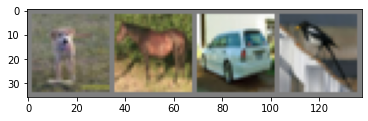

  dog horse   car  bird


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):  # (1)
    img = img / 2 + 0.5  # (1)
    npimg = img.numpy()  # (1)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # (1)
    plt.show()  # (1)

dataiter = iter(trainloader)  # (2)
images, labels = dataiter.next()  # (3)

imshow(torchvision.utils.make_grid(images))  # (4)
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))  # (5)

# リスト4
CNNのクラスを定義するコード。最後にオブジェクトを生成して変数netに格納している

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):  # (1)
    def __init__(self):  # (2)
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # (3)
        self.pool = nn.MaxPool2d(2, 2)  # (4)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # (5)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):  # (6)
        x = self.pool(F.relu(self.conv1(x)))  # (7)
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)  # (8)
        x = F.relu(self.fc1(x))  # (9)
        x = F.relu(self.fc2(x))  # (9)
        x = self.fc3(x)  # (9)
        return x

net = Net()  # (10)

# リスト13
torch.deviceオブジェクトを生成するコード。GPUかCPUかは自動判定する

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# リスト14
CNNのオブジェクトでGPUを使えるようにするコード

In [ ]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

# リスト5
損失関数とオプティマイザを定義するコード

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # (1)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)  # (2)

# リスト6(リスト15)
訓練を実行するコード

In [ ]:
for epoch in range(2):  # (1)
    running_loss = 0.0  # (9)

    for i, data in enumerate(trainloader, 0):  # (2)
        # inputs, labels = data  # (3)
        inputs, labels = data[0].to(device), data[1].to(device)  # リスト15 gpu

        optimizer.zero_grad()  # (4)

        outputs = net(inputs)  # (5)
        loss = criterion(outputs, labels)  # (6)
        loss.backward()  # (7)
        optimizer.step()  # (8)

        running_loss += loss.item()  # (9)
        if i % 2000 == 1999:  # (9)
            print('[%d, %5d] loss: %.3f' %  # (9)
                  (epoch + 1, i + 1, running_loss / 2000))  # (9)
            running_loss = 0.0  # (9)

print('Finished Training')

[1,  2000] loss: 2.183
[1,  4000] loss: 1.861
[1,  6000] loss: 1.676
[1,  8000] loss: 1.566
[1, 10000] loss: 1.504
[1, 12000] loss: 1.456
[2,  2000] loss: 1.374
[2,  4000] loss: 1.363
[2,  6000] loss: 1.353
[2,  8000] loss: 1.322
[2, 10000] loss: 1.293
[2, 12000] loss: 1.293
Finished Training


# リスト7
テスト用データの先頭を取り出して表示するコード

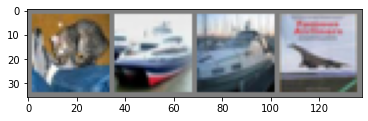

GroundTruth:    cat  ship  ship plane


In [ ]:
dataiter = iter(testloader)  # (1)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# リスト8
先頭のテスト用データを分類するコード

In [ ]:
# outputs = net(images)  # (1)
outputs = net(images.to(device))  # gpu
_, predicted = torch.max(outputs, 1)  # (2)

print('Predicter: ', ' '.join('%5s' % classes[predicted[j]]  # (3)
                              for j in range(4)))  # (3)

Predicter:    cat  ship  ship  ship


# リスト9
先頭より後のテスト用データを分類するコード

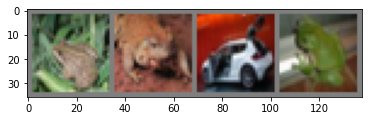

GroundTruth:   frog  frog   car  frog
Predicted:   deer   cat   cat  frog


In [ ]:
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# outputs = net(images)
outputs = net(images.to(device))  # gpu
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

# リスト10
全テストデータの正解率を求めるコード

In [ ]:
correct = 0
total = 0
with torch.no_grad():  # (1)
    for data in testloader:  # (2)
        # images, labels = data
        images, labels = data[0].to(device), data[1].to(device)  # gpu
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)  # (3)
        total += labels.size(0)  # (4)
        correct += (predicted == labels).sum().item()  # (5)

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


# リスト11
全テストデータのクラスごとの正解率を求めるコード

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        # images, labels = data
        images, labels = data[0].to(device), data[1].to(device)  # gpu
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()  # (1)
        for i in range(4):  # (2)
            label = labels[i]  # (2)
            class_correct[label] += c[i].item()  # (2)
            class_total[label] += 1  # (2)


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 55 %
Accuracy of   car : 46 %
Accuracy of  bird : 25 %
Accuracy of   cat : 38 %
Accuracy of  deer : 37 %
Accuracy of   dog : 59 %
Accuracy of  frog : 51 %
Accuracy of horse : 65 %
Accuracy of  ship : 77 %
Accuracy of truck : 77 %


# リスト12
GPUかCPUかを判定するコード

In [ ]:
print(torch.cuda.is_available())

False
